Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved BSD-3 license. (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to NSF for support via CAREER award #1149784.
<a href="https://twitter.com/LorenaABarba">@LorenaABarba</a>. This lesson was written with BU graduate student Gilbert Forsyth.

<h1>12 steps to Navier–Stokes</h1>
This lesson complements the first interactive module of the online <a href="https://github.com/barbagroup/CFDPython">CFD Python</a> class, by Prof. Lorena A. Barba, called 12 Steps to Navier–Stokes. The interactive module starts with simple exercises in 1D that at first use little of the power of Python. We now present some new ways of doing the same things that are more efficient and produce prettier code.

<h2>Defining Functions in Python</h2>
In steps 1 through 8, we wrote Python code that is meant to run from top to bottom. We were able to reuse code (to great effect!) by copying and pasting, to incrementally build a solver for the Burgers' equation. But moving forward there are more efficient ways to write our Python codes. In this lesson, we are going to introduce function definitions, which will allow us more flexibility in reusing and also in organizing our code.

We'll begin with a trivial example: a function which adds two numbers.

To create a function in Python, we start with the following:

   <code> def simpleadd(a,b):</code>

This statement creates a function called simpleadd which takes two inputs, a and b. Let's execute this definition code.

In [9]:
def simpleadd(a,b):
    return a+b

The return statement tells Python for simpleadd to return the sum of a and b when it is called.

In [10]:
simpleadd(3,4)

7

Of course, there can be much more going on than just the return statement

In [12]:
def fibonacci(n):
    a, b=0,1
    for i in range (n):
        a, b=b,a+b
    return a

In [13]:
fibonacci(7)

13

Once defined, the function fibonacci can be called like any of the built in Python functions that we have already used.  For example, print the fibonacci sequence up through the n-th value.

In [14]:
for n in range(10):
    print(fibonacci(n))

0
1
1
2
3
5
8
13
21
34


Remember our short detour on using <a href="https://render.githubusercontent.com/view/07_Step_5.ipynb">array operations with NumPy</a>?

Well, there are a few more ways to make your scientific codes in Python run faster. We recommend the article on the Technical Discovery blog about <a href="http://technicaldiscovery.blogspot.com/2011/06/speeding-up-python-numpy-cython-and.html">Speeding Up Python</a> (June 20, 2011), which talks about NumPy, Cython and Weave. It uses as example the Laplace equation (which we will solve in <a href="https://render.githubusercontent.com/view/12_Step_9.ipynb">Step 9</a>) and makes neat use of defined functions.

But a recent new way to get fast Python codes is <a href="http://numba.pydata.org/">Numba</a>. We'll learn a bit about that after we finish the 12 steps to Navier–Stokes.

There are many exciting things happening in the world of high-performance Python right now, including running parallel Python on multiple Raspberry Pi Single Board Computers!  For Example see <a href="https://www.raspberrypi.org/magpi/parallel-programming/">AN INTRODUCTION TO PARALLEL PROGRAMMING</a> and <a href="https://www.zdnet.com/article/build-your-own-supercomputer-out-of-raspberry-pi-boards/">Build your own supercomputer out of Raspberry Pi boards</a> and <a href="https://pythonprogramming.net/build-supercomputer-raspberry-pi/">Build a Supercompputer with Raspberry Pis</a>

In [34]:
##########################################################################################
# Example from File 3 of the "12 steps to Navier-Stokes" 
#   by Prof Lorena Barba & graduate student Gilbert Forsyth
##########################################################################################

#Remember: Comments in python are denoted by the pound sign 
import numpy                   # Load the numpy maxrix algebra library 
from matplotlib import pyplot  # Load the pyplot from the matplotlib librry
import time, sys               # Load the time and system utilities.

# The following code makes the matplotlib plots appear in the notebook instead of a separate window.
%matplotlib inline 

#make the code into a subroutine that takes the number of x axis grid points nx as input.
def linearconv(nx):
#define our initial grid parameters
    dx = 2 / (nx-1) # distance between grid lines
    nt = 25       #nt = number of time steps we want to calculate
    sigma = 0.5
    dt = sigma*dx    #dt = amount of time each time step covers (delta t)

    c = 1         #assume wavespeed of c=1.

#setup the initial conditions u = 1 from 0 to .5 then U= 2 from .5 to 1.0 then u = 1 from 1 -> 2
#note Boundary Conditions u = 1 at x = 0 and x = 2
    u = numpy.ones(nx)    #use the numpy library function ones to create our array
    u[int(.5/dx):int(1/dx + 1)] = 2 # setting u = 2 between x - .5 and 1 as per our initial conditions

    un = numpy.ones(nx) # initialize a temporary array

    for n in range(nt): #loop for values of n from 0 to nt, ie the outter loop will run nt times.
        un = u.copy()   ## copy the existing values of u into un.
        for i in range(2, nx-1): ## try commenting out this line 
            u[i] = un[i] - c*dt / dx*(un[i] - un[i-1])
                
    pyplot.plot(numpy.linspace(0, 2, nx), u); 

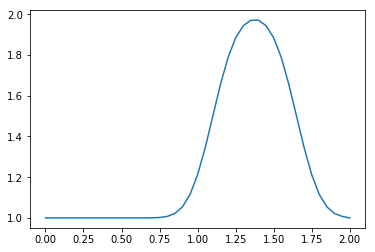

In [35]:
linearconv(41) #number of grid points

In [38]:
##########################################################################################
# Example from file "9 Step_&- 2D Diffusion" of the "12 steps to Navier-Stokes" 
#   by Prof Lorena Barba & graduate student Gilbert Forsyth
##########################################################################################
import numpy
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots

from matplotlib import pyplot, cm
%matplotlib inline

###variable declarations
nx = 31   #grid size in x
ny = 31   #grid size in y
nt = 17   #time interval
nu = .05  #the value of viscosity
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25 #the Courant number.  The value of  sigmamax that will ensure stability depends on the discretization used.
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2

###Create a function that we can run through various nt timesteps
def diffuse(nt):
    #create the u array and initialize it.
    u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        ###Use arrays to solv this to speed things up.
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    #include the plotting in the function.
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)      #create the base grid mesh for our plot
    ###Not sure why we assign this to surface.  maybe used in another step?
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

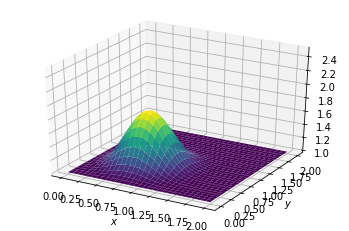

In [39]:
#run our function with time = 14.
diffuse(14)

In [40]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

When run, the cell above executes the style for this notebook.